# **Ex. 1 - First steps with scikit-learn**

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [37]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [40]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [42]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# **Ex. 2 - Modeling class probabilities via logistic regression**

### *Part 1 - Train a logistic regression model* (check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with scikit-learn: use C=100.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set.

/tmp/ipykernel_23782/4187306778.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


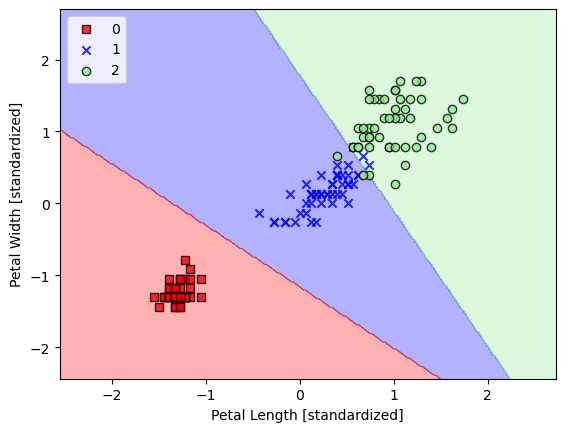

Acurácia no conjunto de teste: 0.98


In [14]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Criar e treinar o modelo de regressão logística
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# Plotar as regiões de decisão
plot_decision_regions(X_combined_std, y_combined, lr)

# Adicionar rótulos ao gráfico
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Avaliar o desempenho no conjunto de teste
accuracy = lr.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')


### *Part 2 - Tackling overfitting via regularization*: evaluate different values for C (up to 100) and observe the accuracy difference between training and test sets. Plot the results.

# **Ex. 3 - Maximum margin classification with support vector machines**

### *Part 1 - Dealing with the nonlinearly separable case using slack variables* (check linear kernel at https://scikit-learn.org/stable/modules/svm.html): use C=1.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set.

In [15]:
from sklearn.svm import SVC

In [16]:
svm = SVC(kernel='linear', C=1.0, random_state=1)

In [17]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='orange',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


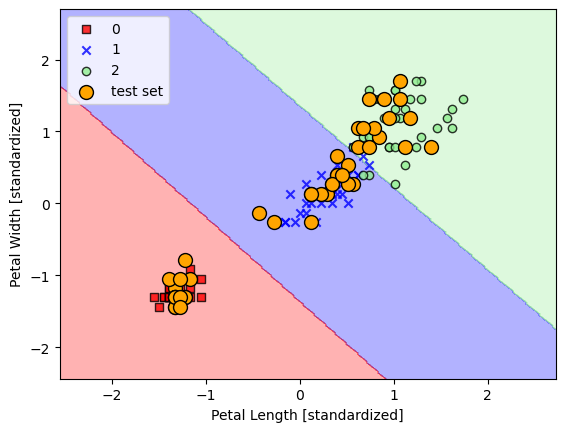

In [18]:

svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [19]:
accuracy = svm.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

Acurácia no conjunto de teste: 0.98


### *Part 2 - Using the kernel trick to find separating hyperplanes in higher dimensional space*: use kernel='rbf', C=1.0, gamma=0.2, and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. Compare and discuss the results with the previous case. Try different values for the kernel parameter and evaluate the results.

In [20]:
from sklearn.svm import SVC

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


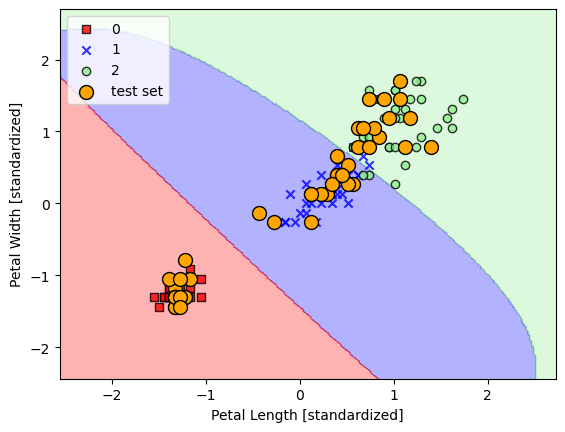

Acurácia no conjunto de teste com kernel RBF: 0.98


In [21]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.2, random_state=1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm_rbf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_rbf = svm_rbf.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com kernel RBF: {accuracy_rbf:.2f}')

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


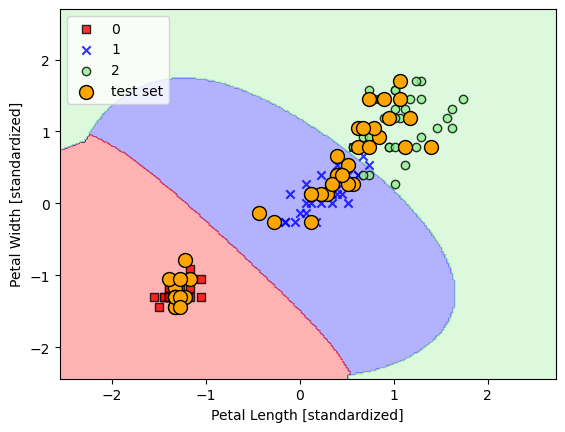

Acurácia no conjunto de teste com kernel RBF: 0.98


In [22]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.4, random_state=1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm_rbf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_rbf = svm_rbf.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com kernel RBF: {accuracy_rbf:.2f}')

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


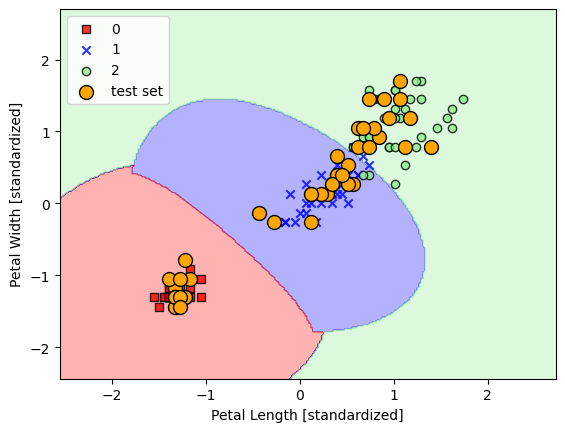

Acurácia no conjunto de teste com kernel RBF: 0.98


In [23]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.6, random_state=1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm_rbf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_rbf = svm_rbf.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com kernel RBF: {accuracy_rbf:.2f}')

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


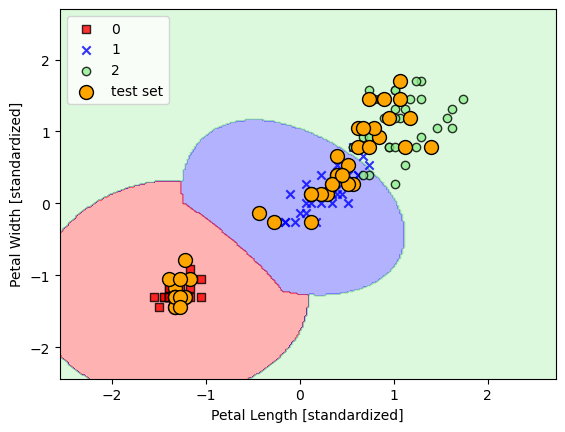

Acurácia no conjunto de teste com kernel RBF: 0.98


In [24]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.8, random_state=1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm_rbf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_rbf = svm_rbf.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com kernel RBF: {accuracy_rbf:.2f}')

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


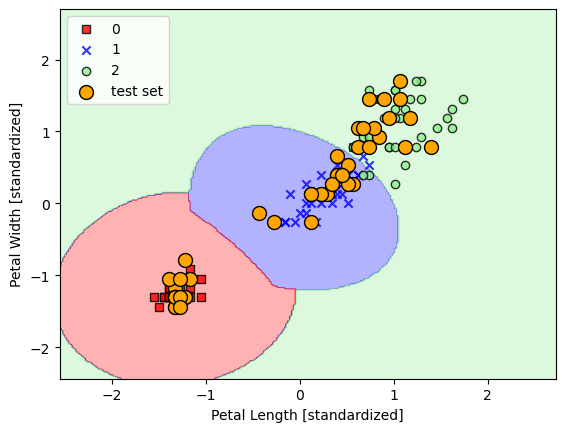

Acurácia no conjunto de teste com kernel RBF: 0.98


In [25]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=1, random_state=1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm_rbf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_rbf = svm_rbf.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com kernel RBF: {accuracy_rbf:.2f}')

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


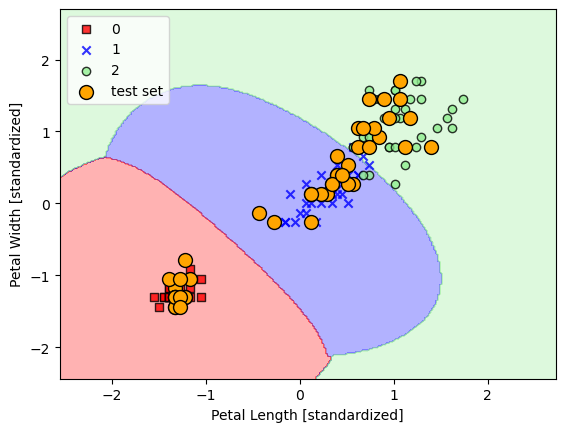

Acurácia no conjunto de teste com kernel RBF: 0.98


In [26]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.5, random_state=1)
svm_rbf.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, svm_rbf, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_rbf = svm_rbf.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com kernel RBF: {accuracy_rbf:.2f}')

In [27]:
#OBS: Apesar de mudar o erro acontece na interceção entre verde e azul e a divisão fica sempre muito semelhante

# **Ex. 4 - Decision tree learning**

### *Part 1 - Building a decision tree* (check https://scikit-learn.org/stable/modules/tree.html): use criterion='entropy', max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Try different values for the max_depth and check the result.

In [28]:
from sklearn.tree import DecisionTreeClassifier

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


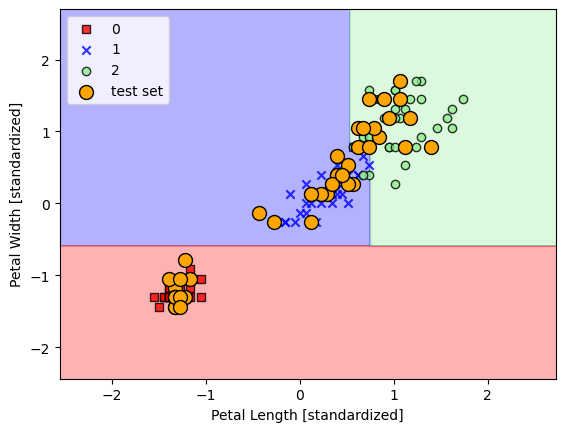

Acurácia no conjunto de teste com árvore de decisão: 0.93


In [29]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, tree, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_tree = tree.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com árvore de decisão: {accuracy_tree:.2f}')

In [30]:
for i in range(15):
  tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=1)
  tree.fit(X_train_std, y_train)
  accuracy_tree = tree.score(X_test_std, y_test)
  print(f'Acurácia no conjunto de teste com árvore de decisão: {accuracy_tree:.2f}, max_depth = {i+1}')

Acurácia no conjunto de teste com árvore de decisão: 0.67, max_depth = 1
Acurácia no conjunto de teste com árvore de decisão: 0.96, max_depth = 2
Acurácia no conjunto de teste com árvore de decisão: 0.96, max_depth = 3
Acurácia no conjunto de teste com árvore de decisão: 0.93, max_depth = 4
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 5
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 6
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 7
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 8
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 9
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 10
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 11
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 12
Acurácia no conjunto de teste com árvore de decisão: 0.98, max_depth = 13
Acurácia no conjunto de teste com árvore de dec

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


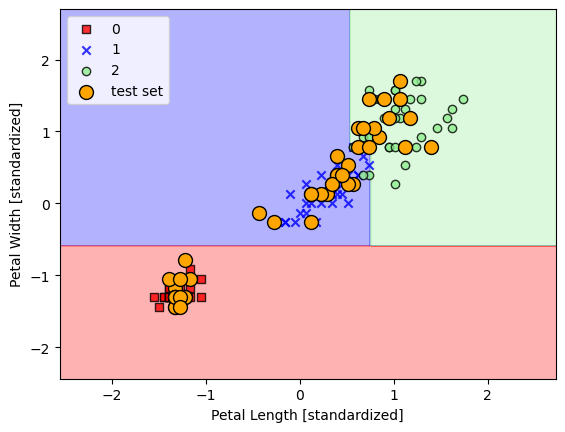

Acurácia no conjunto de teste com árvore de decisão: 0.98


In [31]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
tree.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, tree, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_tree = tree.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com árvore de decisão: {accuracy_tree:.2f}')

In [32]:
#OBS: Escolhido max_depth=5 pois é a arvore com menos profundidade e com melhor resultado

### *Part 2 - Combining weak to strong learners via random forests* (check https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): use criterion='entropy', n_estimators=25, max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Compare with the single tree case. Try different values for the number of trees and check the result.

In [33]:
from sklearn.ensemble import RandomForestClassifier

/tmp/ipykernel_23782/2178342334.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


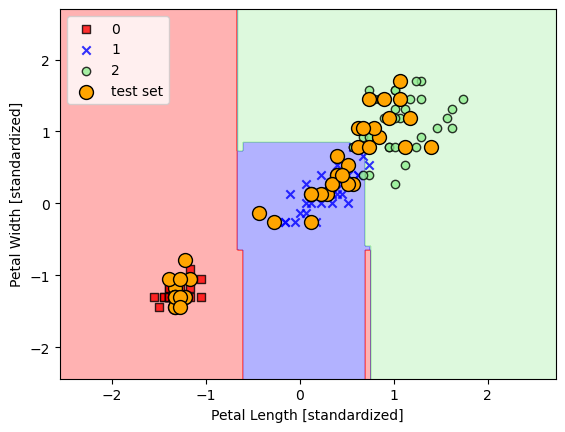

Acurácia no conjunto de teste com Random Forest: 0.98


In [34]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=25, max_depth=4, random_state=1)
forest.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, forest, test_idx=range(len(y_train), len(y_combined)))
plt.xlabel('Petal Length [standardized]')
plt.ylabel('Petal Width [standardized]')
plt.legend(loc='upper left')
plt.show()
accuracy_forest = forest.score(X_test_std, y_test)
print(f'Acurácia no conjunto de teste com Random Forest: {accuracy_forest:.2f}')

In [35]:
val = [10,15,20,30,35,40,45,50,60,75,85,100]
for i in range(len(val)):
  forest = RandomForestClassifier(criterion='entropy', n_estimators=val[i], max_depth=4, random_state=1)
  forest.fit(X_train_std, y_train)
  accuracy_forest = forest.score(X_test_std, y_test)
  print(f'Acurácia no conjunto de teste com Random Forest: {accuracy_forest:.2f}, com n_estimators = {val[i]}')

Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 10
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 15
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 20
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 30
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 35
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 40
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 45
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 50
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 60
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 75
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 85
Acurácia no conjunto de teste com Random Forest: 0.98, com n_estimators = 100


In [36]:
#OBS: nesse caso indepentende do valor do n_estimators o resultado foi melhor, em comparação com a arvore de decisão do EX4 Part 1 é que parece mais facil chegar num bom modelo sem fazer tantos experimentos de paramentros